# 중고차 가격 데이터 분석

## 데이터 불러오기

In [ ]:
### 필요한 라이브러리 임폴트
import pandas as pd

In [ ]:
### 데이터프레임 생성

# 파일 경로 설정
file_path='/content/drive/MyDrive/KDT/머신러닝/used_car.csv'

# pd.read_csv() 사용
df = pd.read_csv(file_path, index_col=0)

# 결과 확인하기
print(df)

                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type     Mileage 

## 데이터 전처리

### 누락 데이터 처리

In [ ]:
### 각 컬럼별 누락 데이터의 수 확인 --> isnull().sum() 사용
print(df.isnull().sum())

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64


In [ ]:
### New_Price 컬럼 --> 제거
cleaned_df = df.drop(columns=['New_Price'])

# 결과 확인하기
print(cleaned_df)

                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type     Mileage 

In [ ]:
### Mileage, Engine, Power, Seats 컬럼 --> 누락 데이터가 있는 행 제거
cleaned_df.dropna(subset=['Mileage', 'Engine', 'Power', 'Seats'], inplace=True)

# 결과 확인하기
print(cleaned_df)

                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type     Mileage 

In [ ]:
### index --> reset --> df.reset_index()
cleaned_df.reset_index(drop=True, inplace=True)

# 결과 확인하기
print(cleaned_df)

                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
5867                  Maruti Swift VDI       Delhi  2014              27365   
5868          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
5869             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
5870                Maruti Wagon R VXI     Kolkata  2013              46000   
5871             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type     Mileage 

In [ ]:
### 데이터프레임의 기본 정보 확인
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   object 
 8   Engine             5872 non-null   object 
 9   Power              5872 non-null   object 
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 550.6+ KB


### 단위 제거

In [ ]:
'''
1. 목표 : 값에 단위가 붙어있는 컬럼에 대해서 단위 제거
2. 대상 컬럼 : Mileage, Engine, Power
3. 예시) 28.4 kmpl --> 28.4
4. 방법 : 공백을 기준으로 문자열 split --> "28.4 kmpl".split()[0]
'''

# string = "28.4 kmpl"
# def split_unit(x):
#     return x.split()[0]

# result = split_unit(string)

# print(result)

# Mileage 컬럼
cleaned_df.loc[:, 'Mileage'] = cleaned_df.loc[:, 'Mileage'].apply(lambda x:x.split()[0])

# Engine 컬럼
cleaned_df.loc[:, 'Engine'] = cleaned_df.loc[:, 'Engine'].apply(lambda x:x.split()[0])

# Power 컬럼
cleaned_df.loc[:, 'Power'] = cleaned_df.loc[:, 'Power'].apply(lambda x:x.split()[0])

# 결과 확인하기
print(cleaned_df)

                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
5867                  Maruti Swift VDI       Delhi  2014              27365   
5868          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
5869             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
5870                Maruti Wagon R VXI     Kolkata  2013              46000   
5871             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type Mileage Engi

In [ ]:
### 단위 제거 후 기본 정보 확인
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   object 
 8   Engine             5872 non-null   object 
 9   Power              5872 non-null   object 
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 550.6+ KB


#### 자료형 변환

In [ ]:
"""
1. 목표 : Mileage, Engine, Power 컬럼의 성격(자료형) --> 문자열 --> float 변환
2. 사용 함수 : df.astype({'col1':'float', 'col2':'int'})
"""

# df.astype() 함수 적용
cleaned_df = cleaned_df.astype({'Mileage':'float', 'Engine':'float', 'Power':'float'})

# 결과 확인하기 --> info() 함수 사용
print('자료형 변환의 결과')
cleaned_df.info()

자료형 변환의 결과
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 550.6+ KB


### 이상치 처리

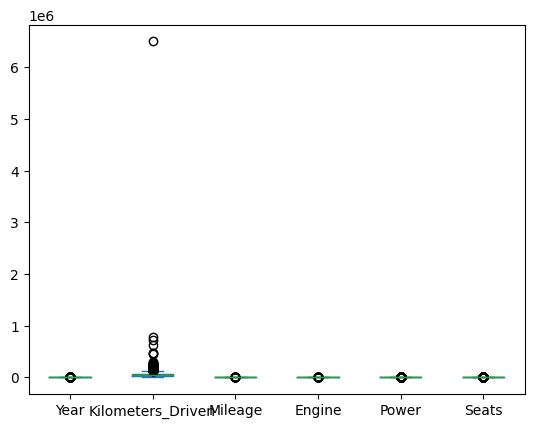

In [ ]:
### boxplot --> 이상치 확인

# 필요한 라이브러리 임폴트
import matplotlib.pyplot as plt

cleaned_df.loc[:, ['Year', 'Kilometers_Driven','Mileage','Engine','Power','Seats']].plot(kind='box')
plt.show()

#### Year 컬럼

In [ ]:
### Year 컬럼의 첫번째 이상치 판단

"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""

# iqr 추출
q1 = cleaned_df.loc[:, 'Year'].quantile(q=0.25)
q3 = cleaned_df.loc[:, 'Year'].quantile(q=0.75)
iqr = q3 - q1
print(f'Year 컬럼의 첫번째 iqr = {iqr}')

print('-'*80)

# 정상 범위의 최소값
min = q1 - (1.5*iqr)
print(f'Year 컬럼의 첫번째 정상 범위의 최소값 = {min}')

print('-'*80)

# 정상 범위의 최대값
max = q3 + (1.5*iqr)
print(f'Year 컬럼의 첫번째 정상 범위의 최대값 = {max}')

print('-'*80)

# 이상치 추출
condition = (cleaned_df.loc[:, 'Year']<min) | (cleaned_df.loc[:, 'Year']>max)
print(f'Year 컬럼의 이상치에 대한 첫번째 블리언 배열 : \n{condition}')
print('-'*80)
outlier_index = cleaned_df.loc[:, 'Year'].loc[condition].index
print(f'Year 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('-'*80)

# 이상치 제거 --> df.col.drop(index=outlier_index)
cleaned_Year = cleaned_df.loc[:, 'Year'].drop(index=outlier_index)
print(f'결과 확인하기 : \n{cleaned_Year}')

Year 컬럼의 첫번째 iqr = 4.0
--------------------------------------------------------------------------------
Year 컬럼의 첫번째 정상 범위의 최소값 = 2006.0
--------------------------------------------------------------------------------
Year 컬럼의 첫번째 정상 범위의 최대값 = 2022.0
--------------------------------------------------------------------------------
Year 컬럼의 이상치에 대한 첫번째 블리언 배열 : 
0       False
1       False
2       False
3       False
4       False
        ...  
5867    False
5868    False
5869    False
5870    False
5871    False
Name: Year, Length: 5872, dtype: bool
--------------------------------------------------------------------------------
Year 컬럼의 첫번째 이상치 데이터의 인덱스 : 
Int64Index([ 215,  263,  302,  323,  338,  351,  402,  472,  479,  517,
            ...
            5518, 5577, 5702, 5749, 5751, 5770, 5772, 5781, 5811, 5839],
           dtype='int64', length=105)
--------------------------------------------------------------------------------
결과 확인하기 : 
0       2010
1       2015
2       2011
3    

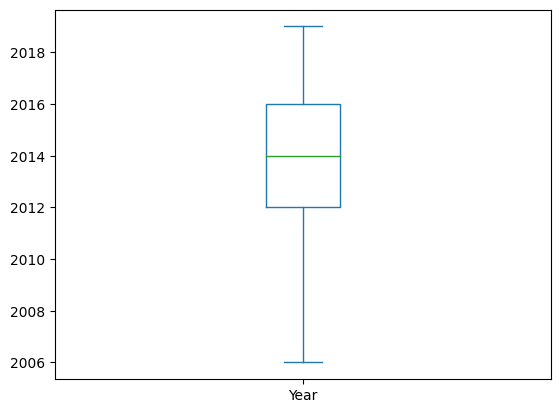

In [ ]:
### Year 컬럼의 두번째 이상치 판단

"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""

# 첫번째 이상치 제거 후 cleaned_Year 컬럼 --> 이상치 유무 확인 --> boxplot
cleaned_Year.plot(kind='box')
plt.show()


# # iqr 추출
# q1 = cleaned_df.loc[:, 'Year'].quantile(q=0.25)
# q3 = cleaned_df.loc[:, 'Year'].quantile(q=0.75)
# iqr = q3 - q1
# print(f'Year 컬럼의 첫번째 iqr = {iqr}')

# print('-'*80)

# # 정상 범위의 최소값
# min = q1 - (1.5*iqr)
# print(f'Year 컬럼의 첫번째 정상 범위의 최소값 = {min}')

# print('-'*80)

# # 정상 범위의 최대값
# max = q3 + (1.5*iqr)
# print(f'Year 컬럼의 첫번째 정상 범위의 최대값 = {max}')

# print('-'*80)

# # 이상치 추출
# condition = (cleaned_df.loc[:, 'Year']<min) | (cleaned_df.loc[:, 'Year']>max)
# print(f'Year 컬럼의 이상치에 대한 첫번째 블리언 배열 : \n{condition}')
# print('-'*80)
# outlier_index = cleaned_df.loc[:, 'Year'].loc[condition].index
# print(f'Year 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{outlier_index}')

# print('-'*80)

# # 이상치 제거 --> df.col.drop(index=outlier_index)
# cleaned_Year = cleaned_df.loc[:, 'Year'].drop(index=outlier_index)
# print(f'결과 확인하기 : \n{cleaned_Year}')

#### Kilometers_Driven 컬럼

In [ ]:
### Kilometers_Driven 컬럼의 첫번째 이상치 판단

"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""

# iqr 추출
q1 = cleaned_df.loc[:, 'Kilometers_Driven'].quantile(q=0.25)
q3 = cleaned_df.loc[:, 'Kilometers_Driven'].quantile(q=0.75)
iqr = q3 - q1
print(f'Kilometers_Driven 컬럼의 첫번째 iqr = {iqr}')

print('-'*80)

# 정상 범위의 최소값
min = q1 - (1.5*iqr)
print(f'Kilometers_Driven 컬럼의 첫번째 정상 범위의 최소값 = {min}')

print('-'*80)

# 정상 범위의 최대값
max = q3 + (1.5*iqr)
print(f'Kilometers_Driven 컬럼의 첫번째 정상 범위의 최대값 = {max}')

print('-'*80)

# 이상치 추출
condition = (cleaned_df.loc[:, 'Kilometers_Driven']<min) | (cleaned_df.loc[:, 'Kilometers_Driven']>max)
print(f'Kilometers_Driven 컬럼의 이상치에 대한 첫번째 블리언 배열 : \n{condition}')
print('-'*80)
outlier_index = cleaned_df.loc[:, 'Kilometers_Driven'].loc[condition].index
print(f'Kilometers_Driven 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('-'*80)

# 이상치 제거 --> df.col.drop(index=outlier_index)
cleaned_Kilometers = cleaned_df.loc[:, 'Kilometers_Driven'].drop(index=outlier_index)
print(f'결과 확인하기 : \n{cleaned_Kilometers}')

Kilometers_Driven 컬럼의 첫번째 iqr = 38980.25
--------------------------------------------------------------------------------
Kilometers_Driven 컬럼의 첫번째 정상 범위의 최소값 = -25047.875
--------------------------------------------------------------------------------
Kilometers_Driven 컬럼의 첫번째 정상 범위의 최대값 = 130873.125
--------------------------------------------------------------------------------
Kilometers_Driven 컬럼의 이상치에 대한 첫번째 블리언 배열 : 
0       False
1       False
2       False
3       False
4       False
        ...  
5867    False
5868    False
5869    False
5870    False
5871    False
Name: Kilometers_Driven, Length: 5872, dtype: bool
--------------------------------------------------------------------------------
Kilometers_Driven 컬럼의 첫번째 이상치 데이터의 인덱스 : 
Int64Index([  29,   64,   76,  149,  159,  160,  176,  221,  241,  251,
            ...
            5659, 5661, 5693, 5699, 5709, 5711, 5729, 5770, 5807, 5811],
           dtype='int64', length=199)
---------------------------------------------

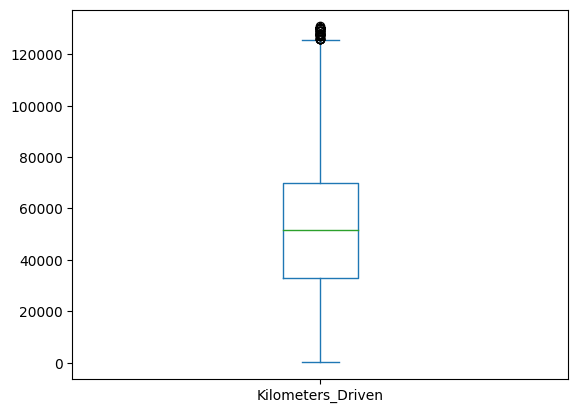

--------------------------------------------------------------------------------
Kiometers_Driven 컬럼의 두번째 iqr = 37224.0
--------------------------------------------------------------------------------
Kiometers_Driven 컬럼의 두번째 정상 범위의 최소값 = -23060.0
--------------------------------------------------------------------------------
Kiometers_Driven 컬럼의 두번째 정상 범위의 최대값 = 125836.0
--------------------------------------------------------------------------------
Kilometers_Driven 컬럼의 이상치에 대한 두번째 블리언 배열 : 
0       False
1       False
2       False
3       False
4       False
        ...  
5867    False
5868    False
5869    False
5870    False
5871    False
Name: Kilometers_Driven, Length: 5673, dtype: bool
--------------------------------------------------------------------------------
Kilometers_Driven 컬럼의 두번째 이상치 데이터의 인덱스 : 
Int64Index([ 115,  349,  471,  519,  558,  606,  888, 1041, 1574, 1686, 1931,
            2234, 2486, 2546, 2598, 2869, 3020, 3066, 3122, 3189, 3234, 3336,
            334

In [ ]:
### Kilometers_Driven 컬럼의 두번째 이상치 판단

"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""

# 첫번째 이상치 제거 후 cleaned_KIlometers 컬럼 --> 이상치 유무 확인 --> boxplot
cleaned_Kilometers.plot(kind='box')
plt.show()

print('-'*80)

# iqr 추출
q1 = cleaned_Kilometers.quantile(q=0.25)
q3 = cleaned_Kilometers.quantile(q=0.75)
iqr = q3 - q1
print(f'Kiometers_Driven 컬럼의 두번째 iqr = {iqr}')

print('-'*80)

# 정상 범위의 최소값
min = q1 - (1.5*iqr)
print(f'Kiometers_Driven 컬럼의 두번째 정상 범위의 최소값 = {min}')

print('-'*80)

# 정상 범위의 최대값
max = q3 + (1.5*iqr)
print(f'Kiometers_Driven 컬럼의 두번째 정상 범위의 최대값 = {max}')

print('-'*80)

# 이상치 추출
condition = (cleaned_Kilometers<min) | (cleaned_Kilometers>max)
print(f'Kilometers_Driven 컬럼의 이상치에 대한 두번째 블리언 배열 : \n{condition}')
print('-'*80)
outlier_index = cleaned_Kilometers.loc[condition].index
print(f'Kilometers_Driven 컬럼의 두번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('-'*80)

# 이상치 제거 --> df.col.drop(index=outlier_index)
cleaned_Kilometers2 = cleaned_Kilometers.drop(index=outlier_index)
print(f'결과 확인하기 : \n{cleaned_Kilometers2}')

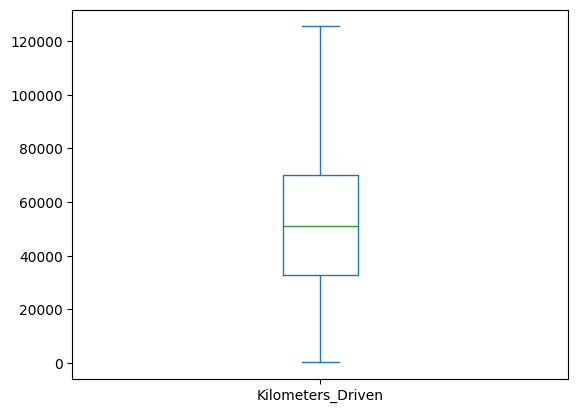

In [ ]:
### Kilometers_Driven 컬럼의 세번째 이상치 판단

"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""

# 첫번째 이상치 제거 후 cleaned_KIlometers 컬럼 --> 이상치 유무 확인 --> boxplot
cleaned_Kilometers2.plot(kind='box')
plt.show()

# print('-'*80)

# # iqr 추출
# q1 = cleaned_Kilometers.quantile(q=0.25)
# q3 = cleaned_Kilometers.quantile(q=0.75)
# iqr = q3 - q1
# print(f'Kiometers_Driven 컬럼의 두번째 iqr = {iqr}')

# print('-'*80)

# # 정상 범위의 최소값
# min = q1 - (1.5*iqr)
# print(f'Kiometers_Driven 컬럼의 두번째 정상 범위의 최소값 = {min}')

# print('-'*80)

# # 정상 범위의 최대값
# max = q3 + (1.5*iqr)
# print(f'Kiometers_Driven 컬럼의 두번째 정상 범위의 최대값 = {max}')

# print('-'*80)

# # 이상치 추출
# condition = (cleaned_Kilometers<min) | (cleaned_Kilometers>max)
# print(f'Kilometers_Driven 컬럼의 이상치에 대한 두번째 블리언 배열 : \n{condition}')
# print('-'*80)
# outlier_index = cleaned_Kilometers.loc[condition].index
# print(f'Kilometers_Driven 컬럼의 두번째 이상치 데이터의 인덱스 : \n{outlier_index}')

# print('-'*80)

# # 이상치 제거 --> df.col.drop(index=outlier_index)
# cleaned_Kilometers2 = cleaned_Kilometers.drop(index=outlier_index)
# print(f'결과 확인하기 : \n{cleaned_Kilometers2}')

#### Mileage 컬럼

In [ ]:
### Mileage 컬럼의 첫번째 이상치 판단

"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""

# iqr 추출
q1 = cleaned_df.loc[:, 'Mileage'].quantile(q=0.25)
q3 = cleaned_df.loc[:, 'Mileage'].quantile(q=0.75)
iqr = q3 - q1
print(f'Mileage 컬럼의 첫번째 iqr = {iqr}')

print('-'*80)

# 정상 범위의 최소값
min = q1 - (1.5*iqr)
print(f'Mileage 컬럼의 첫번째 정상 범위의 최소값 = {min}')

print('-'*80)

# 정상 범위의 최대값
max = q3 + (1.5*iqr)
print(f'Mileage 컬럼의 첫번째 정상 범위의 최대값 = {max}')

print('-'*80)

# 이상치 추출
condition = (cleaned_df.loc[:, 'Mileage']<min) | (cleaned_df.loc[:, 'Mileage']>max)
print(f'Mileage 컬럼의 이상치에 대한 첫번째 블리언 배열 : \n{condition}')
print('-'*80)
outlier_index = cleaned_df.loc[:, 'Mileage'].loc[condition].index
print(f'Mileage 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('-'*80)

# 이상치 제거 --> df.col.drop(index=outlier_index)
cleaned_Mileage = cleaned_df.loc[:, 'Mileage'].drop(index=outlier_index)
print(f'결과 확인하기 : \n{cleaned_Mileage}')

Mileage 컬럼의 첫번째 iqr = 5.840000000000002
--------------------------------------------------------------------------------
Mileage 컬럼의 첫번째 정상 범위의 최소값 = 6.499999999999998
--------------------------------------------------------------------------------
Mileage 컬럼의 첫번째 정상 범위의 최대값 = 29.860000000000003
--------------------------------------------------------------------------------
Mileage 컬럼의 이상치에 대한 첫번째 블리언 배열 : 
0       False
1       False
2       False
3       False
4       False
        ...  
5867    False
5868    False
5869    False
5870    False
5871    False
Name: Mileage, Length: 5872, dtype: bool
--------------------------------------------------------------------------------
Mileage 컬럼의 첫번째 이상치 데이터의 인덱스 : 
Int64Index([  14,   67,  526,  685,  932,  966, 1029, 1226, 1236, 1273, 1295,
            1316, 1718, 2009, 2309, 2605, 2625, 2963, 3011, 3036, 3046, 3126,
            3186, 3460, 3768, 4033, 4124, 4192, 4300, 4571, 4587, 4648, 4888,
            4894, 5048, 5178, 5241, 5571, 5640

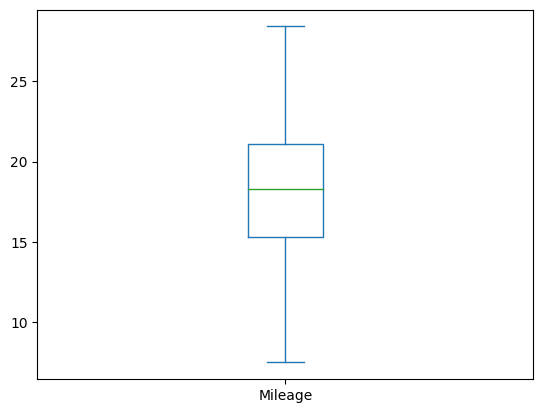

In [ ]:
### Mileage 컬럼의 두번째 이상치 판단

"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""

# 첫번째 이상치 제거 후 cleaned_KIlometers 컬럼 --> 이상치 유무 확인 --> boxplot
cleaned_Mileage.plot(kind='box')
plt.show()

# print('-'*80)

# # iqr 추출
# q1 = cleaned_Kilometers.quantile(q=0.25)
# q3 = cleaned_Kilometers.quantile(q=0.75)
# iqr = q3 - q1
# print(f'Kiometers_Driven 컬럼의 두번째 iqr = {iqr}')

# print('-'*80)

# # 정상 범위의 최소값
# min = q1 - (1.5*iqr)
# print(f'Kiometers_Driven 컬럼의 두번째 정상 범위의 최소값 = {min}')

# print('-'*80)

# # 정상 범위의 최대값
# max = q3 + (1.5*iqr)
# print(f'Kiometers_Driven 컬럼의 두번째 정상 범위의 최대값 = {max}')

# print('-'*80)

# # 이상치 추출
# condition = (cleaned_Kilometers<min) | (cleaned_Kilometers>max)
# print(f'Kilometers_Driven 컬럼의 이상치에 대한 두번째 블리언 배열 : \n{condition}')
# print('-'*80)
# outlier_index = cleaned_Kilometers.loc[condition].index
# print(f'Kilometers_Driven 컬럼의 두번째 이상치 데이터의 인덱스 : \n{outlier_index}')

# print('-'*80)

# # 이상치 제거 --> df.col.drop(index=outlier_index)
# cleaned_Kilometers2 = cleaned_Kilometers.drop(index=outlier_index)
# print(f'결과 확인하기 : \n{cleaned_Kilometers2}')

#### Engine 컬럼

In [ ]:
### Engine 컬럼의 첫번째 이상치 판단

"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""

# iqr 추출
q1 = cleaned_df.loc[:, 'Engine'].quantile(q=0.25)
q3 = cleaned_df.loc[:, 'Engine'].quantile(q=0.75)
iqr = q3 - q1
print(f'Engine 컬럼의 첫번째 iqr = {iqr}')

print('-'*80)

# 정상 범위의 최소값
min = q1 - (1.5*iqr)
print(f'Engine 컬럼의 첫번째 정상 범위의 최소값 = {min}')

print('-'*80)

# 정상 범위의 최대값
max = q3 + (1.5*iqr)
print(f'Engine 컬럼의 첫번째 정상 범위의 최대값 = {max}')

print('-'*80)

# 이상치 추출
condition = (cleaned_df.loc[:, 'Engine']<min) | (cleaned_df.loc[:, 'Engine']>max)
print(f'Engine 컬럼의 이상치에 대한 첫번째 블리언 배열 : \n{condition}')
print('-'*80)
outlier_index = cleaned_df.loc[:, 'Engine'].loc[condition].index
print(f'Engine 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('-'*80)

# 이상치 제거 --> df.col.drop(index=outlier_index)
cleaned_Engine = cleaned_df.loc[:, 'Engine'].drop(index=outlier_index)
print(f'결과 확인하기 : \n{cleaned_Engine}')

Engine 컬럼의 첫번째 iqr = 793.0
--------------------------------------------------------------------------------
Engine 컬럼의 첫번째 정상 범위의 최소값 = 8.5
--------------------------------------------------------------------------------
Engine 컬럼의 첫번째 정상 범위의 최대값 = 3180.5
--------------------------------------------------------------------------------
Engine 컬럼의 이상치에 대한 첫번째 블리언 배열 : 
0       False
1       False
2       False
3       False
4       False
        ...  
5867    False
5868    False
5869    False
5870    False
5871    False
Name: Engine, Length: 5872, dtype: bool
--------------------------------------------------------------------------------
Engine 컬럼의 첫번째 이상치 데이터의 인덱스 : 
Int64Index([  70,  147,  442,  567,  570,  671,  681,  772,  780, 1008, 1045,
            1062, 1314, 1389, 1552, 1678, 1882, 2048, 2517, 2593, 2605, 2898,
            2948, 2983, 2997, 3032, 3112, 3158, 3254, 3487, 3933, 4028, 4118,
            4232, 4276, 4338, 4446, 4512, 4575, 4602, 4700, 4747, 4781, 4813,
            

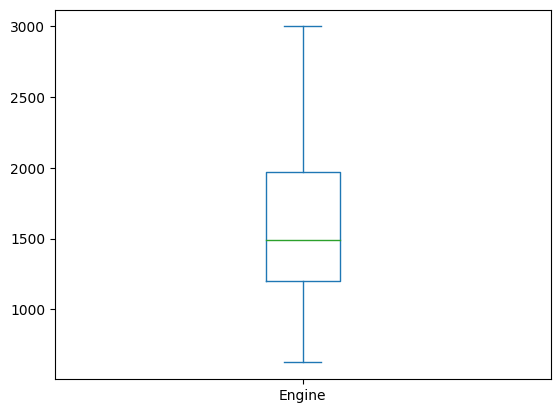

In [ ]:
### Engine 컬럼의 두번째 이상치 판단

"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""

# 첫번째 이상치 제거 후 cleaned_Engine 컬럼 --> 이상치 유무 확인 --> boxplot
cleaned_Engine.plot(kind='box')
plt.show()

# print('-'*80)

# # iqr 추출
# q1 = cleaned_Kilometers.quantile(q=0.25)
# q3 = cleaned_Kilometers.quantile(q=0.75)
# iqr = q3 - q1
# print(f'Kiometers_Driven 컬럼의 두번째 iqr = {iqr}')

# print('-'*80)

# # 정상 범위의 최소값
# min = q1 - (1.5*iqr)
# print(f'Kiometers_Driven 컬럼의 두번째 정상 범위의 최소값 = {min}')

# print('-'*80)

# # 정상 범위의 최대값
# max = q3 + (1.5*iqr)
# print(f'Kiometers_Driven 컬럼의 두번째 정상 범위의 최대값 = {max}')

# print('-'*80)

# # 이상치 추출
# condition = (cleaned_Kilometers<min) | (cleaned_Kilometers>max)
# print(f'Kilometers_Driven 컬럼의 이상치에 대한 두번째 블리언 배열 : \n{condition}')
# print('-'*80)
# outlier_index = cleaned_Kilometers.loc[condition].index
# print(f'Kilometers_Driven 컬럼의 두번째 이상치 데이터의 인덱스 : \n{outlier_index}')

# print('-'*80)

# # 이상치 제거 --> df.col.drop(index=outlier_index)
# cleaned_Kilometers2 = cleaned_Kilometers.drop(index=outlier_index)
# print(f'결과 확인하기 : \n{cleaned_Kilometers2}')

#### Power 컬럼

In [ ]:
### Power 컬럼의 첫번째 이상치 판단

"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""

# iqr 추출
q1 = cleaned_df.loc[:, 'Power'].quantile(q=0.25)
q3 = cleaned_df.loc[:, 'Power'].quantile(q=0.75)
iqr = q3 - q1
print(f'Power 컬럼의 첫번째 iqr = {iqr}')

print('-'*80)

# 정상 범위의 최소값
min = q1 - (1.5*iqr)
print(f'Power 컬럼의 첫번째 정상 범위의 최소값 = {min}')

print('-'*80)

# 정상 범위의 최대값
max = q3 + (1.5*iqr)
print(f'Power 컬럼의 첫번째 정상 범위의 최대값 = {max}')

print('-'*80)

# 이상치 추출
condition = (cleaned_df.loc[:, 'Power']<min) | (cleaned_df.loc[:, 'Power']>max)
print(f'Power 컬럼의 이상치에 대한 첫번째 블리언 배열 : \n{condition}')
print('-'*80)
outlier_index = cleaned_df.loc[:, 'Power'].loc[condition].index
print(f'Power 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('-'*80)

# 이상치 제거 --> df.col.drop(index=outlier_index)
cleaned_Power = cleaned_df.loc[:, 'Power'].drop(index=outlier_index)
print(f'결과 확인하기 : \n{cleaned_Power}')

Power 컬럼의 첫번째 iqr = 63.099999999999994
--------------------------------------------------------------------------------
Power 컬럼의 첫번째 정상 범위의 최소값 = -19.64999999999999
--------------------------------------------------------------------------------
Power 컬럼의 첫번째 정상 범위의 최대값 = 232.75
--------------------------------------------------------------------------------
Power 컬럼의 이상치에 대한 첫번째 블리언 배열 : 
0       False
1       False
2       False
3       False
4       False
        ...  
5867    False
5868    False
5869    False
5870    False
5871    False
Name: Power, Length: 5872, dtype: bool
--------------------------------------------------------------------------------
Power 컬럼의 첫번째 이상치 데이터의 인덱스 : 
Int64Index([  38,   70,  100,  104,  130,  143,  147,  163,  209,  253,
            ...
            5640, 5641, 5662, 5726, 5742, 5775, 5782, 5800, 5861, 5864],
           dtype='int64', length=238)
--------------------------------------------------------------------------------
결과 확인하기 : 
0        58

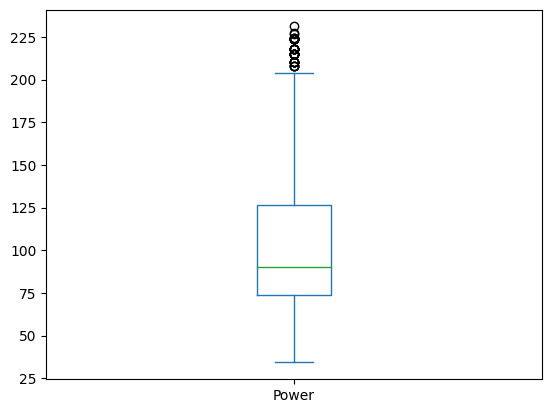

--------------------------------------------------------------------------------
Power 컬럼의 두번째 iqr = 52.31999999999999
--------------------------------------------------------------------------------
Power 컬럼의 두번째 정상 범위의 최소값 = -4.47999999999999
--------------------------------------------------------------------------------
Power 컬럼의 두번째 정상 범위의 최대값 = 204.79999999999998
--------------------------------------------------------------------------------
Power 컬럼의 이상치에 대한 두번째 블리언 배열 : 
0       False
1       False
2       False
3       False
4       False
        ...  
5867    False
5868    False
5869    False
5870    False
5871    False
Name: Power, Length: 5634, dtype: bool
--------------------------------------------------------------------------------
Power 컬럼의 두번째 이상치 데이터의 인덱스 : 
Int64Index([  84,  115,  338,  386,  392,  401,  539,  859,  959, 1005, 1075,
            1145, 1254, 1279, 1435, 1499, 1582, 1595, 1861, 1953, 2052, 2082,
            2200, 2491, 2718, 3136, 3241, 3626, 3629, 3

In [ ]:
### Power 컬럼의 두번째 이상치 판단

"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""

# 첫번째 이상치 제거 후 cleaned_Power 컬럼 --> 이상치 유무 확인 --> boxplot
cleaned_Power.plot(kind='box')
plt.show()

print('-'*80)

# iqr 추출
q1 = cleaned_Power.quantile(q=0.25)
q3 = cleaned_Power.quantile(q=0.75)
iqr = q3 - q1
print(f'Power 컬럼의 두번째 iqr = {iqr}')

print('-'*80)

# 정상 범위의 최소값
min = q1 - (1.5*iqr)
print(f'Power 컬럼의 두번째 정상 범위의 최소값 = {min}')

print('-'*80)

# 정상 범위의 최대값
max = q3 + (1.5*iqr)
print(f'Power 컬럼의 두번째 정상 범위의 최대값 = {max}')

print('-'*80)

# 이상치 추출
condition = (cleaned_Power<min) | (cleaned_Power>max)
print(f'Power 컬럼의 이상치에 대한 두번째 블리언 배열 : \n{condition}')
print('-'*80)
outlier_index = cleaned_Power.loc[condition].index
print(f'Power 컬럼의 두번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('-'*80)

# 이상치 제거 --> df.col.drop(index=outlier_index)
cleaned_Power2 = cleaned_Power.drop(index=outlier_index)
print(f'결과 확인하기 : \n{cleaned_Power2}')

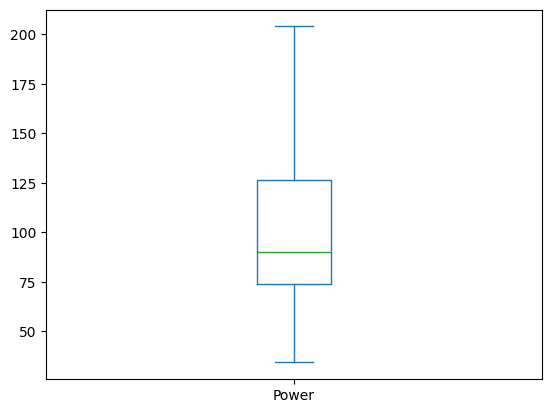

In [ ]:
### Power 컬럼의 세번째 이상치 판단

"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""

# 첫번째 이상치 제거 후 cleaned_Power2 컬럼 --> 이상치 유무 확인 --> boxplot
cleaned_Power2.plot(kind='box')
plt.show()

# print('-'*80)

# # iqr 추출
# q1 = cleaned_Power.quantile(q=0.25)
# q3 = cleaned_Power.quantile(q=0.75)
# iqr = q3 - q1
# print(f'Power 컬럼의 두번째 iqr = {iqr}')

# print('-'*80)

# # 정상 범위의 최소값
# min = q1 - (1.5*iqr)
# print(f'Power 컬럼의 두번째 정상 범위의 최소값 = {min}')

# print('-'*80)

# # 정상 범위의 최대값
# max = q3 + (1.5*iqr)
# print(f'Power 컬럼의 두번째 정상 범위의 최대값 = {max}')

# print('-'*80)

# # 이상치 추출
# condition = (cleaned_Power<min) | (cleaned_Power>max)
# print(f'Power 컬럼의 이상치에 대한 두번째 블리언 배열 : \n{condition}')
# print('-'*80)
# outlier_index = cleaned_Power.loc[condition].index
# print(f'Power 컬럼의 두번째 이상치 데이터의 인덱스 : \n{outlier_index}')

# print('-'*80)

# # 이상치 제거 --> df.col.drop(index=outlier_index)
# cleaned_Power2 = cleaned_Power.drop(index=outlier_index)
# print(f'결과 확인하기 : \n{cleaned_Power2}')

#### Seats 컬럼

In [ ]:
### seats 컬럼의 첫번째 이상치 판단

"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""

# iqr 추출
q1 = cleaned_df.loc[:, 'Seats'].quantile(q=0.25)
q3 = cleaned_df.loc[:, 'Seats'].quantile(q=0.75)
iqr = q3 - q1
print(f'Seats 컬럼의 첫번째 iqr = {iqr}')

print('-'*80)

# 정상 범위의 최소값
min = q1 - (1.5*iqr)
print(f'Seats 컬럼의 첫번째 정상 범위의 최소값 = {min}')

print('-'*80)

# 정상 범위의 최대값
max = q3 + (1.5*iqr)
print(f'Seats 컬럼의 첫번째 정상 범위의 최대값 = {max}')

print('-'*80)

# 이상치 추출
condition = (cleaned_df.loc[:, 'Seats']<min) | (cleaned_df.loc[:, 'Seats']>max)
print(f'Seats 컬럼의 이상치에 대한 첫번째 블리언 배열 : \n{condition}')
print('-'*80)
outlier_index = cleaned_df.loc[:, 'Seats'].loc[condition].index
print(f'Seats 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('-'*80)

# 이상치 제거 --> df.col.drop(index=outlier_index)
cleaned_Seats = cleaned_df.loc[:, 'Seats'].drop(index=outlier_index)
print(f'결과 확인하기 : \n{cleaned_Seats}')

Seats 컬럼의 첫번째 iqr = 0.0
--------------------------------------------------------------------------------
Seats 컬럼의 첫번째 정상 범위의 최소값 = 5.0
--------------------------------------------------------------------------------
Seats 컬럼의 첫번째 정상 범위의 최대값 = 5.0
--------------------------------------------------------------------------------
Seats 컬럼의 이상치에 대한 첫번째 블리언 배열 : 
0       False
1       False
2       False
3        True
4       False
        ...  
5867    False
5868    False
5869     True
5870    False
5871    False
Name: Seats, Length: 5872, dtype: bool
--------------------------------------------------------------------------------
Seats 컬럼의 첫번째 이상치 데이터의 인덱스 : 
Int64Index([   3,    7,   15,   29,   32,   41,   42,   47,   49,   60,
            ...
            5810, 5815, 5821, 5823, 5832, 5836, 5843, 5861, 5865, 5869],
           dtype='int64', length=953)
--------------------------------------------------------------------------------
결과 확인하기 : 
0       5.0
1       5.0
2       5.0
4       

In [ ]:
### cleaned_Seats 컬럼의 분포 확인 --> 5개 짜리로 통일 --> 이상치 제거 후 가격에 영향을 주는 요인으로분 부적합
cleaned_Seats.value_counts()

5.0    4919
Name: Seats, dtype: int64

#### 병합(concat)

In [ ]:
### 병합의 순서 확인 --> cleaned_df의 컬럼 확인
print(cleaned_df.columns)

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')


In [ ]:
### 각 컬럼 병합 --> 데이터프레임 생성
data = [cleaned_df.loc[:, 'Name'],
        cleaned_df.loc[:, 'Location'],
        cleaned_Year,
        cleaned_Kilometers2,
        cleaned_df.loc[:, 'Fuel_Type'],
        cleaned_df.loc[:, 'Transmission'],
        cleaned_df.loc[:, 'Owner_Type'],
        cleaned_Mileage,
        cleaned_Engine,
        cleaned_Power2,
        cleaned_df.loc[:, 'Price']]

df_concat = pd.concat(data, axis=1, join='inner')

# 결과 확인하기
print(df_concat)

                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
5867                  Maruti Swift VDI       Delhi  2014              27365   
5868          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
5869             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
5870                Maruti Wagon R VXI     Kolkata  2013              46000   
5871             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type  Mileage  En

In [ ]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5213 entries, 0 to 5871
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5213 non-null   object 
 1   Location           5213 non-null   object 
 2   Year               5213 non-null   int64  
 3   Kilometers_Driven  5213 non-null   int64  
 4   Fuel_Type          5213 non-null   object 
 5   Transmission       5213 non-null   object 
 6   Owner_Type         5213 non-null   object 
 7   Mileage            5213 non-null   float64
 8   Engine             5213 non-null   float64
 9   Power              5213 non-null   float64
 10  Price              5213 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 488.7+ KB


In [ ]:
cleaned_df.loc[:, 'Location']

0           Mumbai
1             Pune
2          Chennai
3          Chennai
4       Coimbatore
           ...    
5867         Delhi
5868        Jaipur
5869        Jaipur
5870       Kolkata
5871     Hyderabad
Name: Location, Length: 5872, dtype: object

In [ ]:
print(cleaned_df.loc[:, 'Name'].apply(lambda x: x.split()[0]).value_counts())

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Name, dtype: int64


### 불필요한 컬럼 제거

In [ ]:
'''
1. cleaned_df --> 'Name', 'Location', Seats 3개 컬럼 제거
2. df_concat --> 'Name', 'Location'
'''

# 대상 : cleaned_df
df1 = cleaned_df.drop(columns=['Name', 'Location', 'Seats'])
print(f'불필요한 컬럼 제거 후 결과 확인 : \n{df1}')

print('-'*80)

# 대상 : df_concat
df2 = df_concat.drop(columns=['Name', 'Location'])
print(f'불필요한 컬럼 제거 후 결과 확인 : \n{df2}')

불필요한 컬럼 제거 후 결과 확인 : 
      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
0     2010              72000       CNG       Manual      First    26.60   
1     2015              41000    Diesel       Manual      First    19.67   
2     2011              46000    Petrol       Manual      First    18.20   
3     2012              87000    Diesel       Manual      First    20.77   
4     2013              40670    Diesel    Automatic     Second    15.20   
...    ...                ...       ...          ...        ...      ...   
5867  2014              27365    Diesel       Manual      First    28.40   
5868  2015             100000    Diesel       Manual      First    24.40   
5869  2012              55000    Diesel       Manual     Second    14.00   
5870  2013              46000    Petrol       Manual      First    18.90   
5871  2011              47000    Diesel       Manual      First    25.44   

      Engine   Power  Price  
0      998.0   58.16   1.75  
1    

### Feature Engineering

#### Encoding

##### Label Encoding

In [ ]:
### 데이터가 문자열인 컬럼 --> 항목 확인

# 필요한 라이브러리 임폴트
import numpy as np

# df1 --> Fuel_Type, Transmission, Owner_Type
kind1 = np.unique(df1.loc[:, 'Fuel_Type'].values)
print(kind1)
print(f'-'*80)
kind2 = np.unique(df1.loc[:, 'Transmission'].values)
print(kind2)
print('-'*80)
kind3 = np.unique(df1.loc[:, 'Owner_Type'].values)
print(kind3)

print('-'*80)

# df2 --> Fuel_Type, Transmission, Owner_Type
kind1 = np.unique(df2.loc[:, 'Fuel_Type'].values)
print(kind1)
print(f'-'*80)
kind2 = np.unique(df2.loc[:, 'Transmission'].values)
print(kind2)
print('-'*80)
kind3 = np.unique(df2.loc[:, 'Owner_Type'].values)
print(kind3)

['CNG' 'Diesel' 'LPG' 'Petrol']
--------------------------------------------------------------------------------
['Automatic' 'Manual']
--------------------------------------------------------------------------------
['First' 'Fourth & Above' 'Second' 'Third']
--------------------------------------------------------------------------------
['CNG' 'Diesel' 'LPG' 'Petrol']
--------------------------------------------------------------------------------
['Automatic' 'Manual']
--------------------------------------------------------------------------------
['First' 'Fourth & Above' 'Second' 'Third']


In [ ]:
### df1 --> Label Encoding 실행
df1_label = df1.replace({'CNG':0,
                         'Diesel':1,
                         'LPG':2,
                         'Petrol':3,
                         'Automatic':0,
                         'Manual':1,
                         'First':0,
                         'Fourth & Above':1,
                         'Second':2,
                         'Third':3})

# 결과 확인하기
print(df1_label)

      Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  \
0     2010              72000          0             1           0    26.60   
1     2015              41000          1             1           0    19.67   
2     2011              46000          3             1           0    18.20   
3     2012              87000          1             1           0    20.77   
4     2013              40670          1             0           2    15.20   
...    ...                ...        ...           ...         ...      ...   
5867  2014              27365          1             1           0    28.40   
5868  2015             100000          1             1           0    24.40   
5869  2012              55000          1             1           2    14.00   
5870  2013              46000          3             1           0    18.90   
5871  2011              47000          1             1           0    25.44   

      Engine   Power  Price  
0      998.0   58.16 

In [ ]:
### df2 --> Label Encoding 실행
df2_label = df2.replace({'CNG':0,
                         'Diesel':1,
                         'LPG':2,
                         'Petrol':3,
                         'Automatic':0,
                         'Manual':1,
                         'First':0,
                         'Fourth & Above':1,
                         'Second':2,
                         'Third':3})

# 결과 확인하기
print(df2_label)

      Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  \
0     2010              72000          0             1           0    26.60   
1     2015              41000          1             1           0    19.67   
2     2011              46000          3             1           0    18.20   
3     2012              87000          1             1           0    20.77   
4     2013              40670          1             0           2    15.20   
...    ...                ...        ...           ...         ...      ...   
5867  2014              27365          1             1           0    28.40   
5868  2015             100000          1             1           0    24.40   
5869  2012              55000          1             1           2    14.00   
5870  2013              46000          3             1           0    18.90   
5871  2011              47000          1             1           0    25.44   

      Engine   Power  Price  
0      998.0   58.16 

In [ ]:
### df2_label --> 인덱스 재설정 --> reset_index(drop=True, inplace=True)
df2_label.reset_index(drop=True, inplace=True)

# 결과 확인하기
print(df2_label)

      Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  \
0     2010              72000          0             1           0    26.60   
1     2015              41000          1             1           0    19.67   
2     2011              46000          3             1           0    18.20   
3     2012              87000          1             1           0    20.77   
4     2013              40670          1             0           2    15.20   
...    ...                ...        ...           ...         ...      ...   
5208  2014              27365          1             1           0    28.40   
5209  2015             100000          1             1           0    24.40   
5210  2012              55000          1             1           2    14.00   
5211  2013              46000          3             1           0    18.90   
5212  2011              47000          1             1           0    25.44   

      Engine   Power  Price  
0      998.0   58.16 

### 결과 저장하기

In [ ]:
### 전처리의 결과 --> csv 파일로 저장하기

# file 경로 설정하기
df1_file_path = '/content/drive/MyDrive/KDT/머신러닝/used_car_df1.csv'
df1_label_path = '/content/drive/MyDrive/KDT/머신러닝/used_car_df1_label.csv'
df2_file_path = '/content/drive/MyDrive/KDT/머신러닝/used_car_df2.csv'
df2_label_path = '/content/drive/MyDrive/KDT/머신러닝/used_car_df2_label.csv'

# csv 파일로 저장 -->  df.to_csv(file_path, index=False)
df1.to_csv(df1_file_path, index=False)
df1_label.to_csv(df1_label_path, index=False)
df2.to_csv(df2_file_path, index=False)
df2_label.to_csv(df2_label_path, index=False)

### 결과 불러오기

In [ ]:
### 대상 : used_car_df1_label.csv

# 파일 경로 설정
file_path='/content/drive/MyDrive/KDT/머신러닝/used_car_df2_label.csv'

# pd.read_csv() 사용
df2_label = pd.read_csv(file_path)

# 결과 확인하기
print(df2_label)

      Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  \
0     2010              72000          0             1           0    26.60   
1     2015              41000          1             1           0    19.67   
2     2011              46000          3             1           0    18.20   
3     2012              87000          1             1           0    20.77   
4     2013              40670          1             0           2    15.20   
...    ...                ...        ...           ...         ...      ...   
5208  2014              27365          1             1           0    28.40   
5209  2015             100000          1             1           0    24.40   
5210  2012              55000          1             1           2    14.00   
5211  2013              46000          3             1           0    18.90   
5212  2011              47000          1             1           0    25.44   

      Engine   Power  Price  
0      998.0   58.16 

## 학습용 데이터와 평가용 데이터 생성

In [ ]:
### 70:30 비율로 학습용 데이터와 평가용 데이터 분할

# 필요한 함수 임폴트
from sklearn.model_selection import train_test_split

# X_data 생성
X_data1 = df1_label.drop(columns=['Price'])
print(f'이상치가 포함되어 있는 X_data : \n{X_data1}')
print('-'*80)
X_data2 = df2_label.drop(columns=['Price'])
print(f'이상치가 제거된 X_data : \n{X_data2}')

print('-'*80)

# y_data 생성
y_data1 = df1_label.loc[:, 'Price']
print(f'이상치가 포함되어 있는 y_data : \n{y_data1}')
print('-'*80)
y_data2 = df2_label.loc[:, 'Price']
print(f'이상치가 제거된 y_data : \n{y_data2}')

# 학습용 / 평가용 데이터 생성
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_data1,
                                                        y_data1,
                                                        test_size=0.3,
                                                        random_state=0)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2,
                                                        y_data2,
                                                        test_size=0.3,
                                                        random_state=0)

이상치가 포함되어 있는 X_data : 
      Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  \
0     2010              72000          0             1           0    26.60   
1     2015              41000          1             1           0    19.67   
2     2011              46000          3             1           0    18.20   
3     2012              87000          1             1           0    20.77   
4     2013              40670          1             0           2    15.20   
...    ...                ...        ...           ...         ...      ...   
5867  2014              27365          1             1           0    28.40   
5868  2015             100000          1             1           0    24.40   
5869  2012              55000          1             1           2    14.00   
5870  2013              46000          3             1           0    18.90   
5871  2011              47000          1             1           0    25.44   

      Engine   Power  
0    

In [ ]:
### 학습용 데이터의 인덱스와 모양 확인
print(f'이상치가 존재하는 X_train1 모양 확인 : {X_train1.shape} ')
print('-'*80)
print(f'이상치가 존재하는 X_train1 인덱스 확인 : \n{X_train1.index}')
print('-'*80)
print(f'이상치가 존재하는 y_train1 모양 확인 : {y_train1.shape}')
print('-'*80)
print(f'이상치가 존재하는 y_train1 인덱스 확인 : \n{y_train1.index}')
print('-'*80)
print(f'이상치가 제거된 X_train2 모양 확인 : {X_train2.shape} ')
print('-'*80)
print(f'이상치가 제거된 X_train2 인덱스 확인 : \n{X_train2.index}')
print('-'*80)
print(f'이상치가 제거된 y_train2 모양 확인 : {y_train2.shape}')
print('-'*80)
print(f'이상치가 제거된 y_train2 인덱스 확인 : \n{y_train2.index}')

이상치가 존재하는 X_train1 모양 확인 : (4110, 8) 
--------------------------------------------------------------------------------
이상치가 존재하는 X_train1 인덱스 확인 : 
Int64Index([2616,   70, 5812, 1752, 3327, 5172, 4697, 4480,  834, 3090,
            ...
            3468, 4373, 1033, 5827, 4859, 4931, 3264, 1653, 2607, 2732],
           dtype='int64', length=4110)
--------------------------------------------------------------------------------
이상치가 존재하는 y_train1 모양 확인 : (4110,)
--------------------------------------------------------------------------------
이상치가 존재하는 y_train1 인덱스 확인 : 
Int64Index([2616,   70, 5812, 1752, 3327, 5172, 4697, 4480,  834, 3090,
            ...
            3468, 4373, 1033, 5827, 4859, 4931, 3264, 1653, 2607, 2732],
           dtype='int64', length=4110)
--------------------------------------------------------------------------------
이상치가 제거된 X_train2 모양 확인 : (3649, 8) 
--------------------------------------------------------------------------------
이상치가 제거된 X_train2 인덱스 확인 : 

## DecisionTree 회귀 모델을 이용한 중고차 가격 예측

### 모델 생성

In [ ]:
### GridSearchCV 함수 실행

# 필요한 함수 임폴트
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# 최적화 할 기본 모델 생성
base_dt = DecisionTreeRegressor(random_state=0)

# 튜닝할 매개 변수 설정
depth = np.arange(3, 16)
params = {'max_depth':depth}

# GridSearchCV 함수 호출, 모델 생성
grid_dt1 = GridSearchCV(
    estimator=base_dt,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=10
)

grid_dt2 = GridSearchCV(
    estimator=base_dt,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=10
)

# 학습 및 평가
grid_dt1.fit(X_train1, y_train1)
grid_dt2.fit(X_train2, y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
             scoring='neg_mean_squared_error')

In [ ]:
### 최적의 하이퍼파라미터 확인
print(grid_dt1.best_params_)
print('-'*80)
print(grid_dt2.best_params_)

{'max_depth': 10}
--------------------------------------------------------------------------------
{'max_depth': 11}


In [ ]:
### best 모델 생성
from sklearn.tree import DecisionTreeRegressor
best_dt1 = DecisionTreeRegressor(max_depth=10, random_state=0)
best_dt2 = DecisionTreeRegressor(max_depth=11, random_state=0)

### 모델 학습

In [ ]:
best_dt1.fit(X_train1, y_train1)
best_dt2.fit(X_train2, y_train2)

DecisionTreeRegressor(max_depth=11, random_state=0)

### 평가용 데이터를 이용한 예측

In [ ]:
pred_test1 = best_dt1.predict(X_test1)
print(f'이상치가 있는 평가용 데이터에 대한 예측 : \n{pred_test1}')

print('-'*80)

pred_test2 = best_dt2.predict(X_test2)
print(f'이상치가 제거된 평가용 데이터에 대한 예측 : \n{pred_test2}')

이상치가 있는 평가용 데이터에 대한 예측 : 
[ 1.7448     15.74        2.05363636 ...  8.65345794  2.96444444
 28.4525    ]
--------------------------------------------------------------------------------
이상치가 제거된 평가용 데이터에 대한 예측 : 
[ 2.43470588  4.38333333  5.60666667 ...  4.2683871  10.9975
  5.19333333]


### 모델 평가

In [ ]:
# 모델 평가를 위한 함수 임폴트
from sklearn.metrics import mean_squared_error as mse

# 이상치가 존재하는 평가용 데이터에 대한 성능 평가
mse_test1 = mse(y_test1, pred_test1)

# 이상치가 제거된 평가용 데이터에 대한 성능 평가
mse_test2 = mse(y_test2, pred_test2)

# 결과 확인하기
print(f'이상치가 존재하는 평가용 데이터에 대한 성능 = {mse_test1}')
print('-'*80)
print(f'이상치가 제거된 평가용 데이터에 대한 성능 = {mse_test2}')

이상치가 존재하는 평가용 데이터에 대한 성능 = 34.39655426623756
--------------------------------------------------------------------------------
이상치가 제거된 평가용 데이터에 대한 성능 = 9.559196453303805


### 결과 시각화

In [ ]:
### best 모델의 깊이 추출
depth1 = best_dt1.get_depth()
depth2 = best_dt2.get_depth()

# 결과 확인하기
print(f'이상치가 존재하는 데이터로 학습된 best 모델의 깊이 = {depth1}')
print('-'*80)
print(f'이상치가 제거된 데이터로 학습된 best 모델의 깊이 = {depth2}')

이상치가 존재하는 데이터로 학습된 best 모델의 깊이 = 10
--------------------------------------------------------------------------------
이상치가 제거된 데이터로 학습된 best 모델의 깊이 = 11


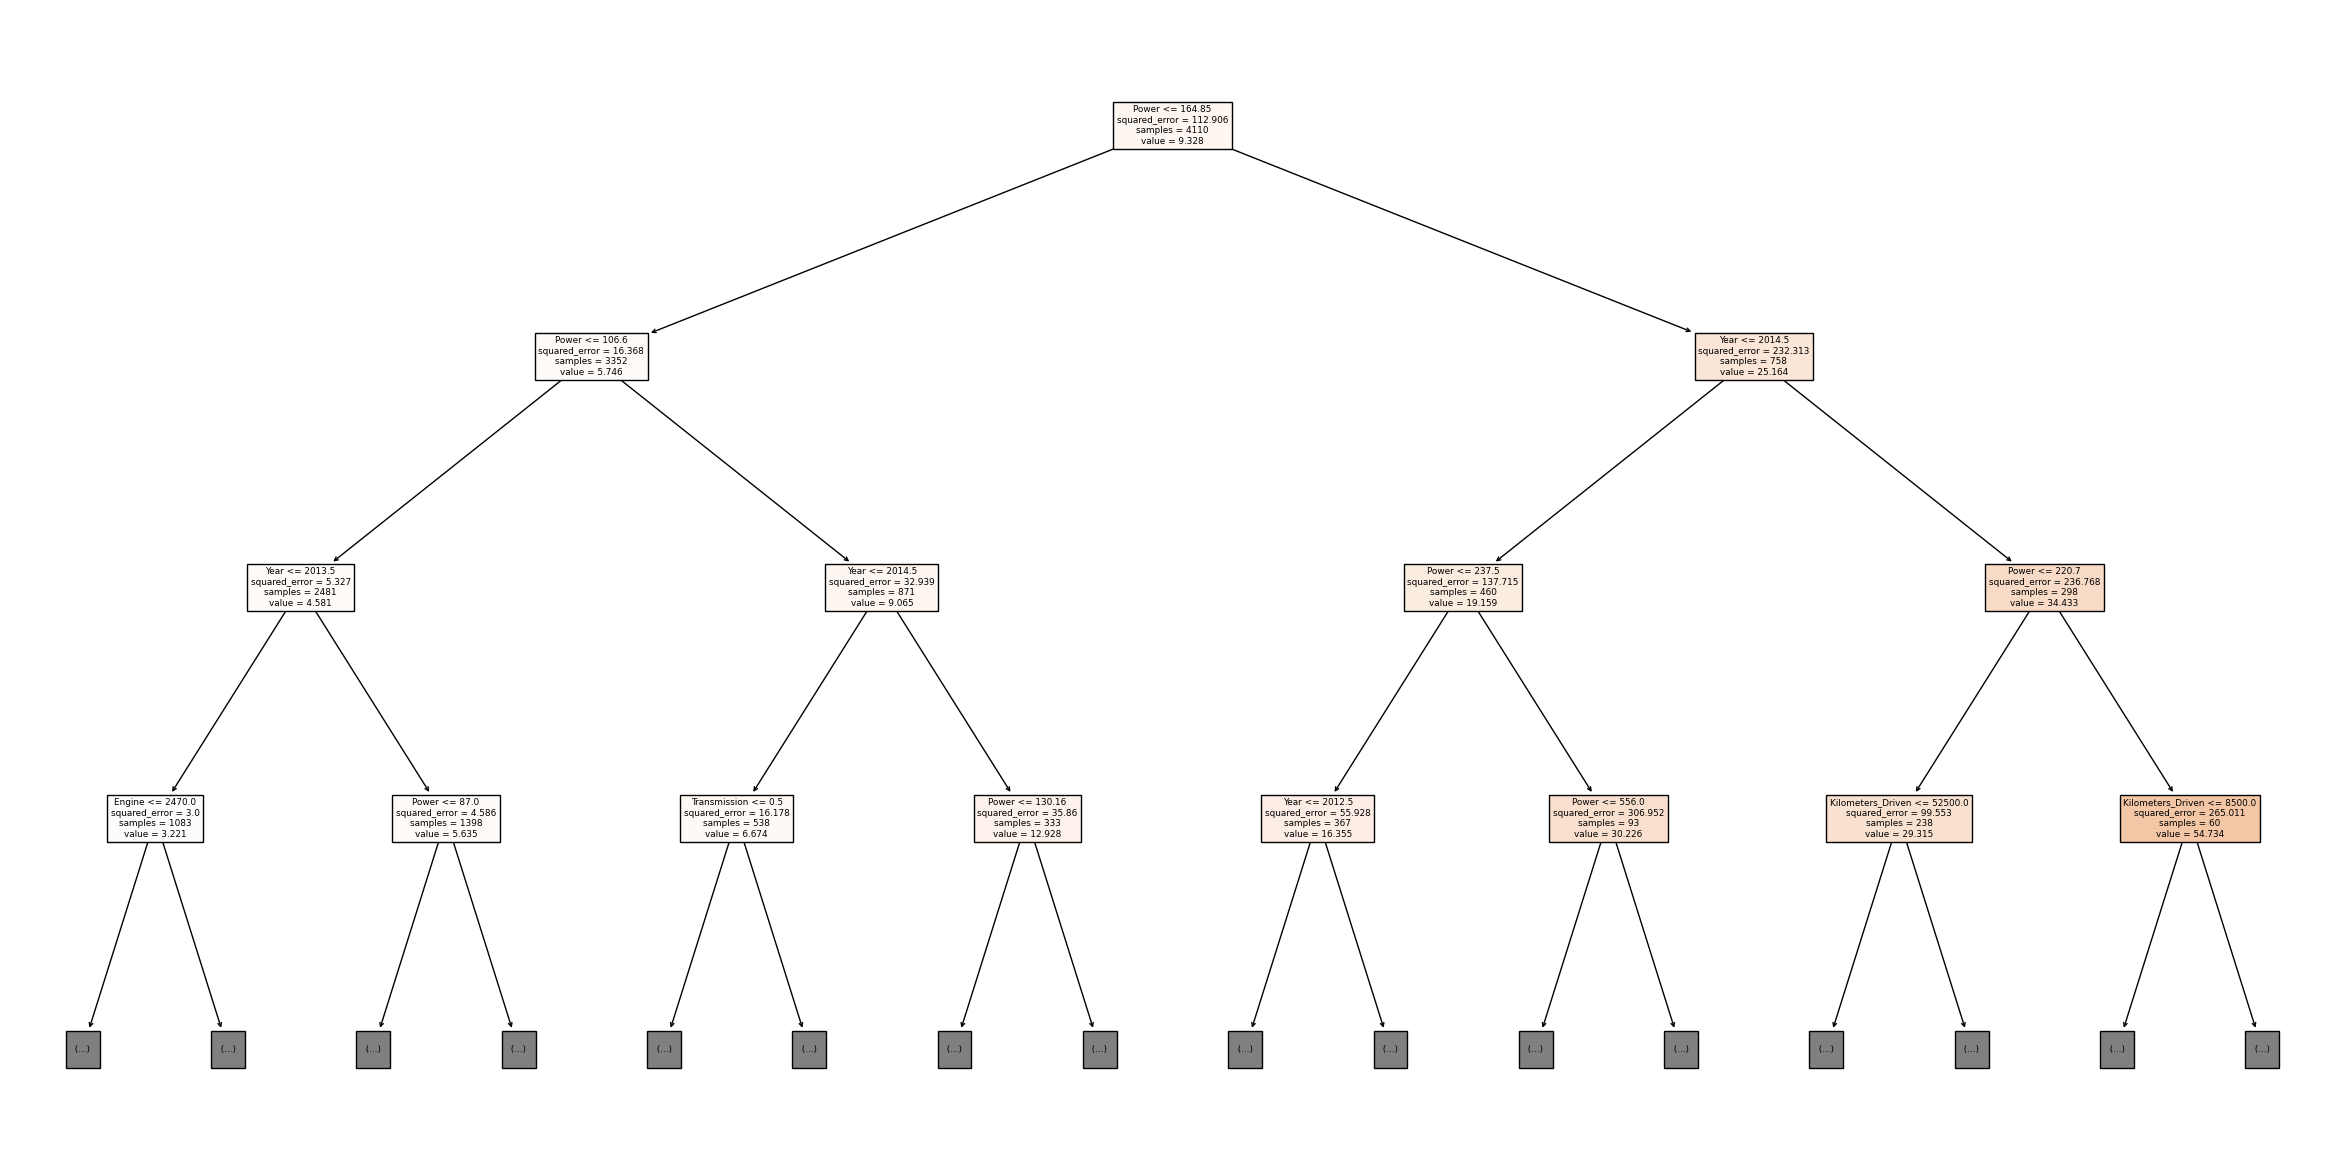

--------------------------------------------------------------------------------


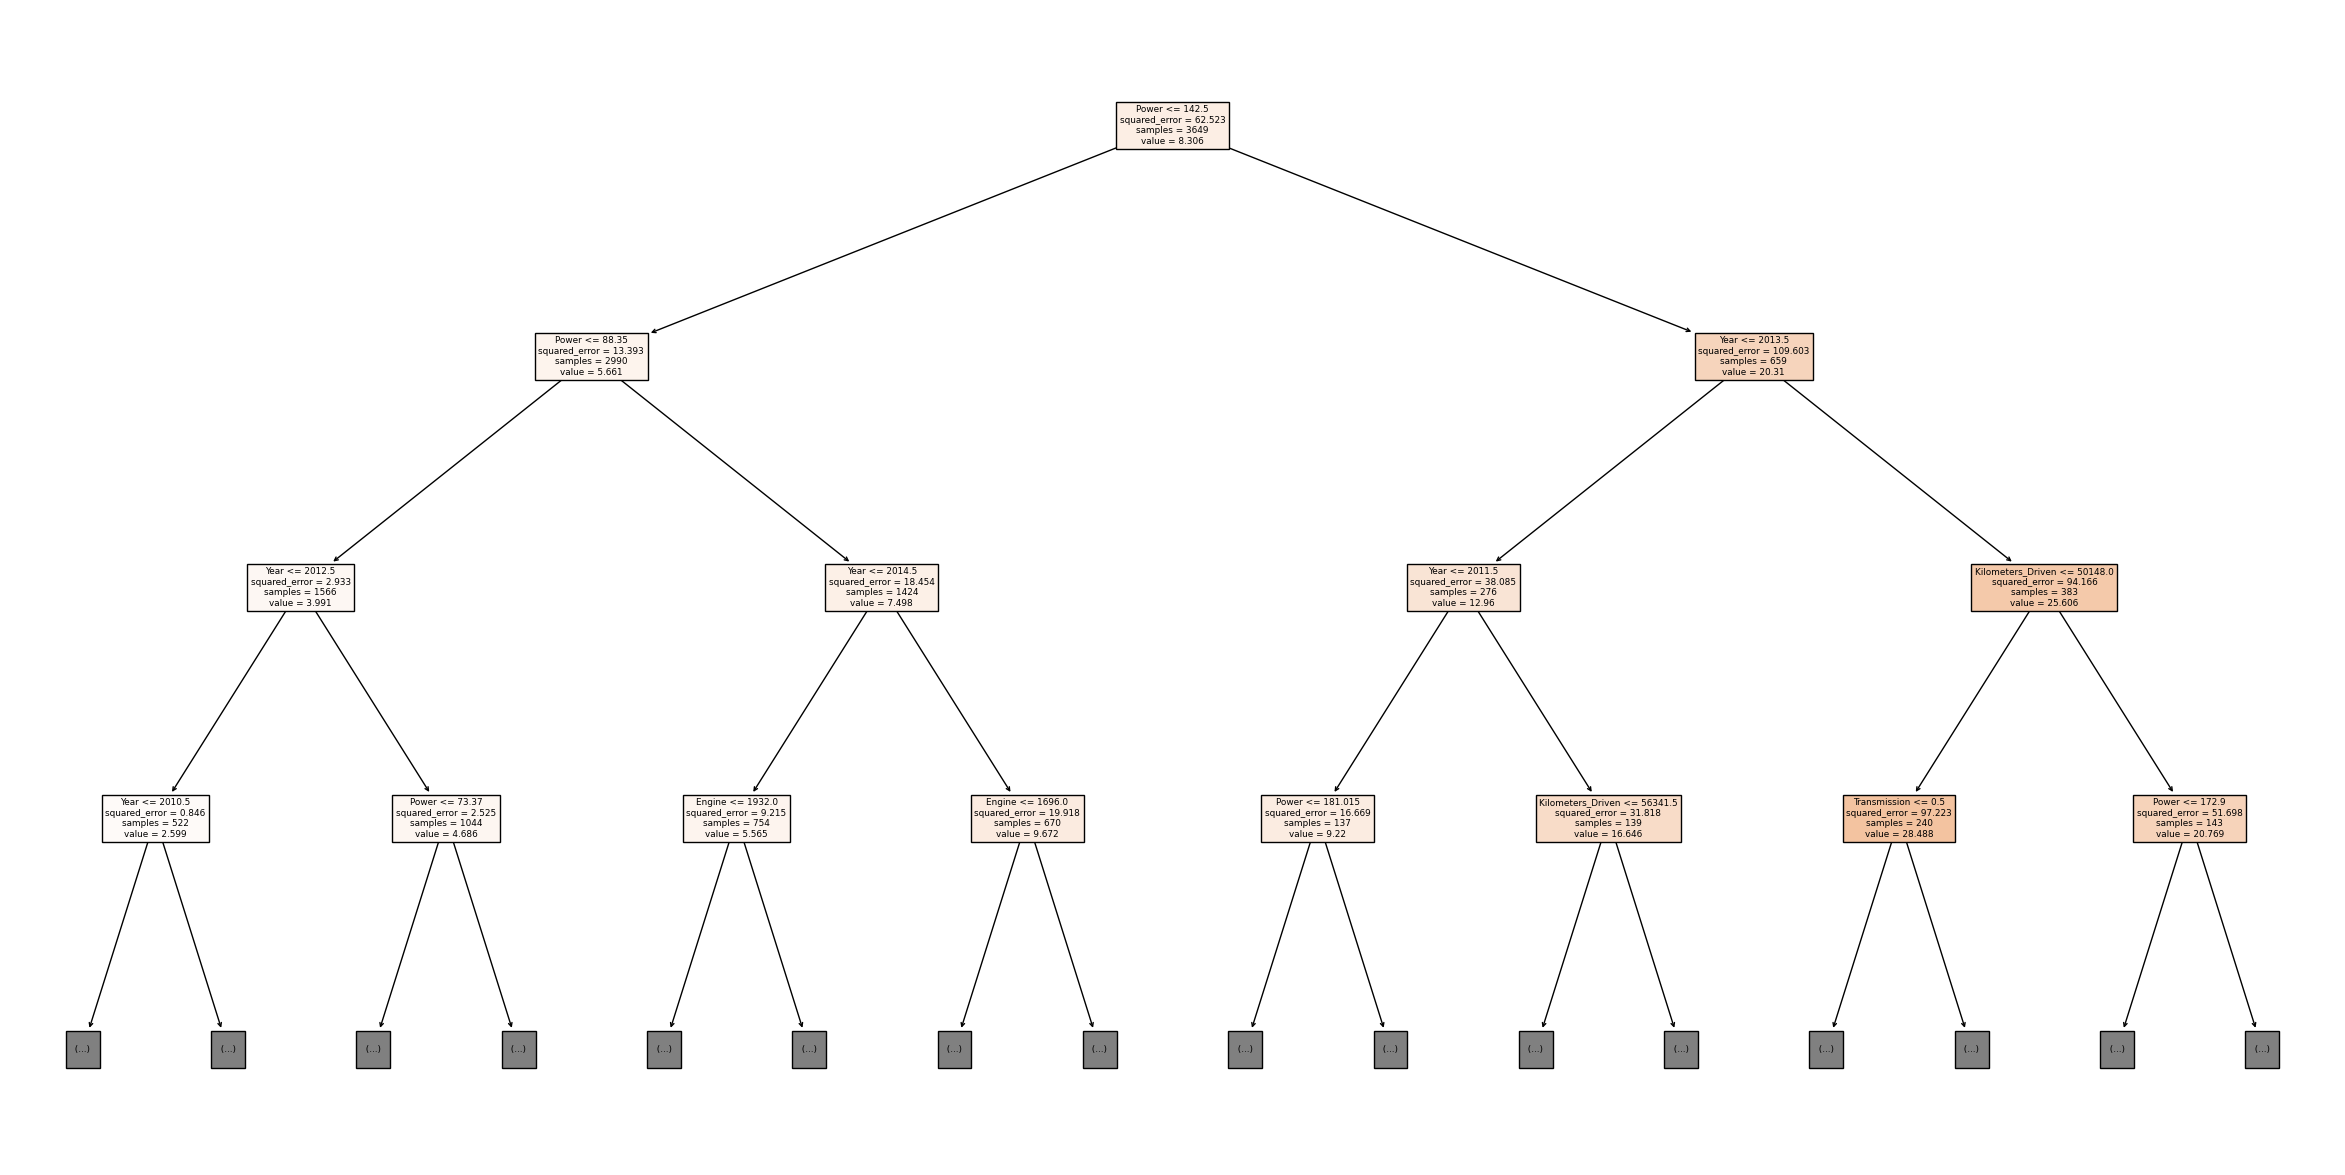

In [ ]:
### plot_tree를 이용한 시각화

# 필요한 함수 임폴트
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 이미지 크기 재설정
plt.figure(figsize=(30,15))

# 이상치가 존재하는 데이터로 학습된 모델의 트리 구조 시각화
plot_tree(best_dt1, max_depth=3, feature_names=X_train1.columns, filled=True)
plt.show()

print('-'*80)

# 이미지 크기 재설정
plt.figure(figsize=(30,15))

# 이상치가 제거된 데이터로 학습된 모델의 트리 구조 시각화
plot_tree(best_dt2, max_depth=3, feature_names=X_train2.columns, filled=True)
plt.show()

[0.17758888 0.04443273 0.00268578 0.0080105  0.00157863 0.02494119
 0.03032727 0.71043502]
--------------------------------------------------------------------------------
[0.19936218 0.04818388 0.00402335 0.0221008  0.00253018 0.03730376
 0.06149394 0.6250019 ]
--------------------------------------------------------------------------------
Year                 0.177589
Kilometers_Driven    0.044433
Fuel_Type            0.002686
Transmission         0.008010
Owner_Type           0.001579
Mileage              0.024941
Engine               0.030327
Power                0.710435
dtype: float64
--------------------------------------------------------------------------------
Year                 0.199362
Kilometers_Driven    0.048184
Fuel_Type            0.004023
Transmission         0.022101
Owner_Type           0.002530
Mileage              0.037304
Engine               0.061494
Power                0.625002
dtype: float64
-----------------------------------------------------------------

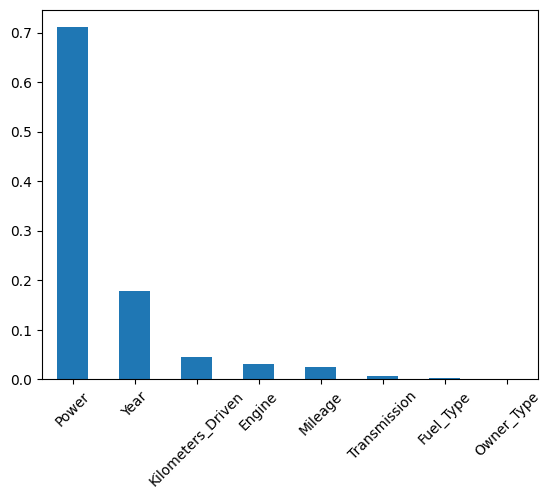

--------------------------------------------------------------------------------


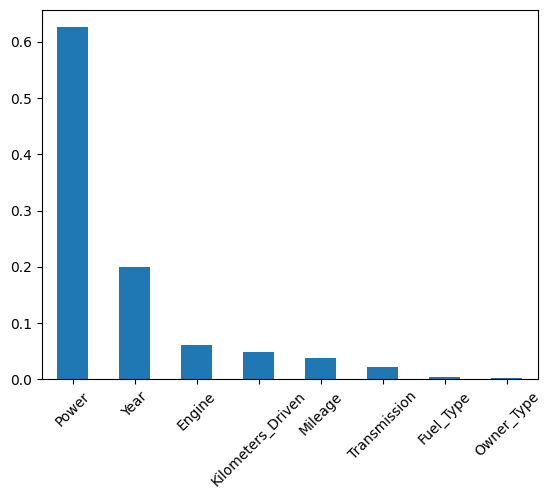

In [ ]:
### feature importance 추출 및 시각화

# 필요한 라이브러리 임폴트
import pandas as pd

# feature importance 추출
importances1 = best_dt1.feature_importances_
print(importances1)
print('-'*80)
importances2 = best_dt2.feature_importances_
print(importances2)

print('-'*80)

# Series 자료형 생성
s_importances1 = pd.Series(data=importances1, index=X_train1.columns)
print(s_importances1)
print('-'*80)
s_importances2 = pd.Series(data=importances2, index=X_train2.columns)
print(s_importances2)

print('-'*80)

# Series 자료형 --> 내림차순 정렬 + 시각화
s_importances1.sort_values(ascending=False).plot(kind='bar', rot=45)
plt.show()
print('-'*80)
s_importances2.sort_values(ascending=False).plot(kind='bar', rot=45)
plt.show()

## RandomForest 회귀 모델을 이용한 중고차 가격 예측

### 모델 생성

In [ ]:
### GridSearchCV 함수 실행

# 필요한 함수 임폴트
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# 최적화 할 기본 모델 생성
base_rf = RandomForestRegressor(random_state=0)

# 튜닝할 매개 변수 설정
params = {'n_estimators':[100, 200, 300, 400]}

# GridSearchCV 함수 호출, 모델 생성
grid_rf1 = GridSearchCV(
    estimator=base_rf,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=10
)

grid_rf2 = GridSearchCV(
    estimator=base_rf,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=10
)

# 학습 및 평가
grid_rf1.fit(X_train1, y_train1)
grid_rf2.fit(X_train2, y_train2)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0),
             param_grid={'n_estimators': [100, 200, 300, 400]},
             scoring='neg_mean_squared_error')

In [ ]:
### 최적의 하이퍼파라미터 확인
print(grid_rf1.best_params_)
print('-'*80)
print(grid_rf2.best_params_)

{'n_estimators': 400}
--------------------------------------------------------------------------------
{'n_estimators': 400}


In [ ]:
### best 모델 생성
best_rf1 = RandomForestRegressor(n_estimators=400, random_state=0)
best_rf2 = RandomForestRegressor(n_estimators=400, random_state=0)

### 모델 학습

In [ ]:
best_rf1.fit(X_train1, y_train1)
best_rf2.fit(X_train2, y_train2)

RandomForestRegressor(n_estimators=400, random_state=0)

### 평가용 데이터를 이용한 예측

In [ ]:
pred_test1 = best_rf1.predict(X_test1)
pred_test2 = best_rf2.predict(X_test2)

### 모델 평가

In [ ]:
# 평가를 위한 함수 임폴트
from sklearn.metrics import mean_squared_error as mse

# 이상치가 포함된 평가용 데이터에 대한 성능 평가
mse_test1 = mse(y_test1, pred_test1)

# 이상치가 제거된 평가용 데이터에 대한 성능 평가
mse_test2 = mse(y_test2, pred_test2)

# 결과 확인하기
print(f'이상치가 포함된 평가용 데이터에 대한 성능 = {mse_test1}')
print('-'*80)
print(f'이상치가 제거된 평가용 데이터에 대한 성능 = {mse_test2}')

이상치가 포함된 평가용 데이터에 대한 성능 = 20.2736167046038
--------------------------------------------------------------------------------
이상치가 제거된 평가용 데이터에 대한 성능 = 5.477210450391363


### 결과 시각화

[0.17342855 0.05639987 0.00381513 0.00821881 0.00312804 0.03084742
 0.04340998 0.68075222]
--------------------------------------------------------------------------------
[0.20504587 0.04827205 0.00681313 0.01759438 0.00288768 0.04185044
 0.06412623 0.61341023]
--------------------------------------------------------------------------------
Year                 0.173429
Kilometers_Driven    0.056400
Fuel_Type            0.003815
Transmission         0.008219
Owner_Type           0.003128
Mileage              0.030847
Engine               0.043410
Power                0.680752
dtype: float64
--------------------------------------------------------------------------------
Year                 0.205046
Kilometers_Driven    0.048272
Fuel_Type            0.006813
Transmission         0.017594
Owner_Type           0.002888
Mileage              0.041850
Engine               0.064126
Power                0.613410
dtype: float64
-----------------------------------------------------------------

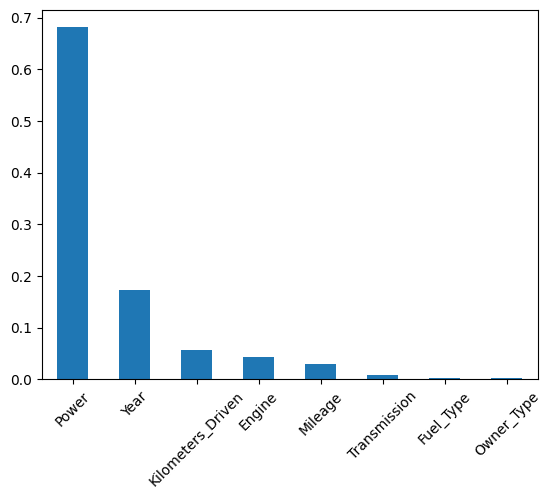

--------------------------------------------------------------------------------


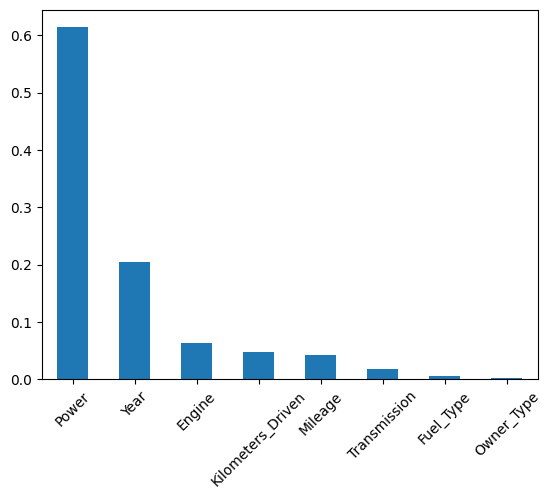

In [ ]:
### feature importance 추출 및 시각화

# 필요한 라이브러리 임폴트
import pandas as pd

# feature importance 추출
importances1 = best_rf1.feature_importances_
print(importances1)
print('-'*80)
importances2 = best_rf2.feature_importances_
print(importances2)

print('-'*80)

# Series 자료형 생성
s_importances1 = pd.Series(data=importances1, index=X_train1.columns)
print(s_importances1)
print('-'*80)
s_importances2 = pd.Series(data=importances2, index=X_train2.columns)
print(s_importances2)

print('-'*80)

# Series 자료형 --> 내림차순 정렬 + 시각화
s_importances1.sort_values(ascending=False).plot(kind='bar', rot=45)
plt.show()
print('-'*80)
s_importances2.sort_values(ascending=False).plot(kind='bar', rot=45)
plt.show()

## XGBoost 회귀 모델을 이용한 중고차 가격 예측

### 모델 생성

In [ ]:
### GridSearchCV 함수 실행

# 필요한 함수 임폴트
from xgboost import XGBRegressor

# 최적화 할 기본 모델 생성
base_xgb = XGBRegressor(random_state=0)

# 튜닝할 매개 변수 설정
params = {'learning_rate':[0.05, 0.1, 0.2, 0.3],
          'n_estimators':[50, 100, 200, 300]}

# GridSearchCV 함수 실행, 모델 생성
grid_xgb1 = GridSearchCV(
    estimator=base_xgb,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=10
)

grid_xgb2 = GridSearchCV(
    estimator=base_xgb,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=10
)

# 학습 및 평가
grid_xgb1.fit(X_train1, y_train1)
grid_xgb2.fit(X_train2, y_train2)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.3],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
### 최적의 하이퍼파라미터 조합 확인
print(grid_xgb1.best_params_)
print('-'*80)
print(grid_xgb2.best_params_)

{'learning_rate': 0.2, 'n_estimators': 100}
--------------------------------------------------------------------------------
{'learning_rate': 0.1, 'n_estimators': 300}


In [ ]:
### best 모델 생성
best_xgb1 = XGBRegressor(learning_rate=0.2, n_estimators=100, random_state=0)
best_xgb2 = XGBRegressor(learning_rate=0.1, n_estimators=300, random_state=0)

### 모델 학습

In [ ]:
best_xgb1.fit(X_train1, y_train1)
best_xgb2.fit(X_train2, y_train2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

### 평가용 데이터를 이용한 예측

In [ ]:
pred_test1 = best_xgb1.predict(X_test1)
pred_test2 = best_xgb2.predict(X_test2)

### 모델 평가

In [ ]:
# 이상치가 포함된 평가용 데이터에 대한 성능 평가
mse_test1 = mse(y_test1, pred_test1)

# 이상치가 제거된 평가용 데이터에 대한 성능 평가
mse_test2 = mse(y_test2, pred_test2)

# 결과 확인하기
print(f'이상치가 포함된 평가용 데이터에 대한 성능 = {mse_test1}')
print('-'*80)
print(f'이상치가 제거된 평가용 데이터에 대한 성능 = {mse_test2}')

이상치가 포함된 평가용 데이터에 대한 성능 = 20.116436606515883
--------------------------------------------------------------------------------
이상치가 제거된 평가용 데이터에 대한 성능 = 4.92519693308856


### 결과 시각화

[0.13433556 0.03457793 0.05021385 0.07906815 0.00975952 0.02407173
 0.06053999 0.60743326]
--------------------------------------------------------------------------------
[0.14549132 0.01533809 0.05263284 0.11772416 0.00686503 0.02642459
 0.08372476 0.55179924]
--------------------------------------------------------------------------------
Year                 0.134336
Kilometers_Driven    0.034578
Fuel_Type            0.050214
Transmission         0.079068
Owner_Type           0.009760
Mileage              0.024072
Engine               0.060540
Power                0.607433
dtype: float32
--------------------------------------------------------------------------------
Year                 0.145491
Kilometers_Driven    0.015338
Fuel_Type            0.052633
Transmission         0.117724
Owner_Type           0.006865
Mileage              0.026425
Engine               0.083725
Power                0.551799
dtype: float32
-----------------------------------------------------------------

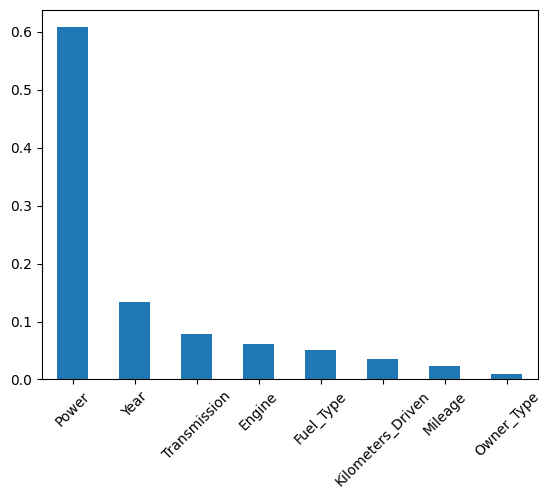

--------------------------------------------------------------------------------


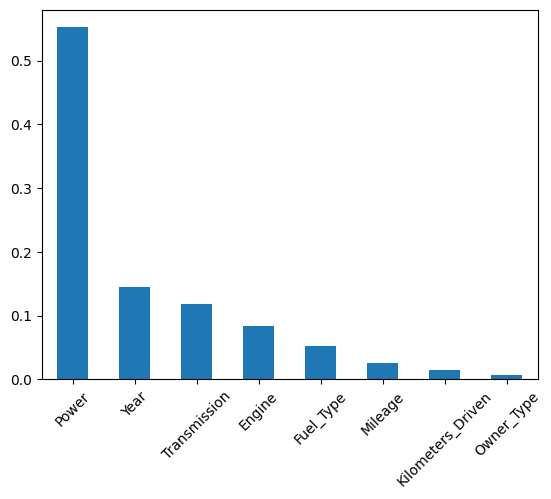

In [ ]:
### feature importance 추출 및 시각화

# 필요한 라이브러리 임폴트
import pandas as pd

# feature importance 추출
importances1 = best_xgb1.feature_importances_
print(importances1)
print('-'*80)
importances2 = best_xgb2.feature_importances_
print(importances2)

print('-'*80)

# Series 자료형 생성
s_importances1 = pd.Series(data=importances1, index=X_train1.columns)
print(s_importances1)
print('-'*80)
s_importances2 = pd.Series(data=importances2, index=X_train2.columns)
print(s_importances2)

print('-'*80)

# Series 자료형 --> 내림차순 정렬 + 시각화
s_importances1.sort_values(ascending=False).plot(kind='bar', rot=45)
plt.show()
print('-'*80)
s_importances2.sort_values(ascending=False).plot(kind='bar', rot=45)
plt.show()

## LightGBM 회귀 모델을 이용한 중고차 가격 예측

### 모델 생성

In [ ]:
### GridSearchCV 함수 실행

# 필요한 함수 임폴트
from lightgbm import LGBMRegressor

# 최적화 할 기본 모델 생성
base_lgbm = LGBMRegressor(random_state=0)

# 튜닝할 매개 변수 설정
params = {'learning_rate':[0.05, 0.1, 0.2, 0.3],
          'n_estimators':[50, 100, 200, 300]}

# GridSearchCV 함수 실행, 모델 생성
grid_lgbm1 = GridSearchCV(
    estimator=base_lgbm,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=10
)

grid_lgbm2 = GridSearchCV(
    estimator=base_lgbm,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=10
)

# 학습 및 평가
grid_lgbm1.fit(X_train1, y_train1)
grid_lgbm2.fit(X_train2, y_train2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 3699, number of used features: 8
[LightGBM] [Info] Start training from score 9.213144
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 3699, number of used features: 8
[LightGBM] [Info] Start training from score 9.360765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

GridSearchCV(cv=10, estimator=LGBMRegressor(random_state=0),
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.3],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
### 최적의 하이퍼파라미터 조합 확인
print(grid_lgbm1.best_params_)
print('-'*80)
print(grid_lgbm2.best_params_)

{'learning_rate': 0.05, 'n_estimators': 300}
--------------------------------------------------------------------------------
{'learning_rate': 0.1, 'n_estimators': 300}


In [ ]:
### best 모델 생성
best_lgbm1 = LGBMRegressor(learning_rate=0.05, n_estimators=300, random_state=0)
best_lgbm2 = LGBMRegressor(learning_rate=0.1, n_estimators=300, random_state=0)

### 모델 학습

In [ ]:
best_lgbm1.fit(X_train1, y_train1)
best_lgbm2.fit(X_train2, y_train2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 4110, number of used features: 8
[LightGBM] [Info] Start training from score 9.327533
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 3649, number of used features: 8
[LightGBM] [Info] Start training from score 8.306369


LGBMRegressor(n_estimators=300, random_state=0)

### 평가용 데이터를 이용한 예측

In [ ]:
pred_test1 = best_lgbm1.predict(X_test1)
pred_test2 = best_lgbm2.predict(X_test2)

### 모델 평가

In [ ]:
# 이상치가 있는 평가용 데이터에 대한 성능 평가
mse_test1 = mse(y_test1, pred_test1)

# 이상치가 제거된 평가용 데이터에 대한 성능 평가
mse_test2 = mse(y_test2, pred_test2)

# 결과 확인하기
print(f'이상치가 있는 평가용 데이터에 대한 성능 = {mse_test1}')
print('-'*80)
print(f'이상치가 제거된 평가용 데이터에 대한 성능 = {mse_test2}')

이상치가 있는 평가용 데이터에 대한 성능 = 17.42116461589072
--------------------------------------------------------------------------------
이상치가 제거된 평가용 데이터에 대한 성능 = 4.955300658459657


### 결과 시각화

[1096 1684  146  161  109 1934 1322 2548]
--------------------------------------------------------------------------------
[1073 2423  152  182   83 2101 1055 1931]
--------------------------------------------------------------------------------
Year                 1096
Kilometers_Driven    1684
Fuel_Type             146
Transmission          161
Owner_Type            109
Mileage              1934
Engine               1322
Power                2548
dtype: int32
--------------------------------------------------------------------------------
Year                 1073
Kilometers_Driven    2423
Fuel_Type             152
Transmission          182
Owner_Type             83
Mileage              2101
Engine               1055
Power                1931
dtype: int32
--------------------------------------------------------------------------------


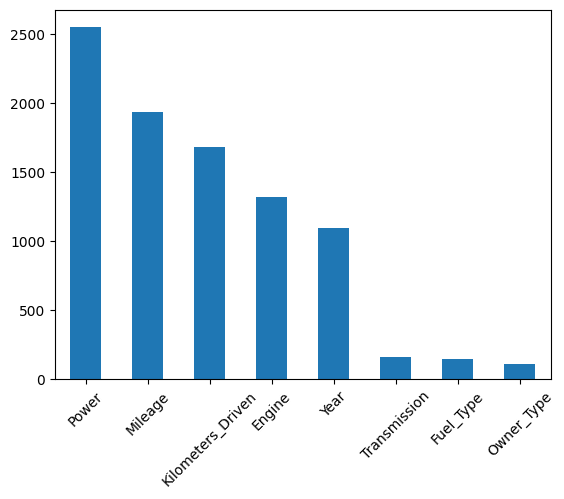

--------------------------------------------------------------------------------


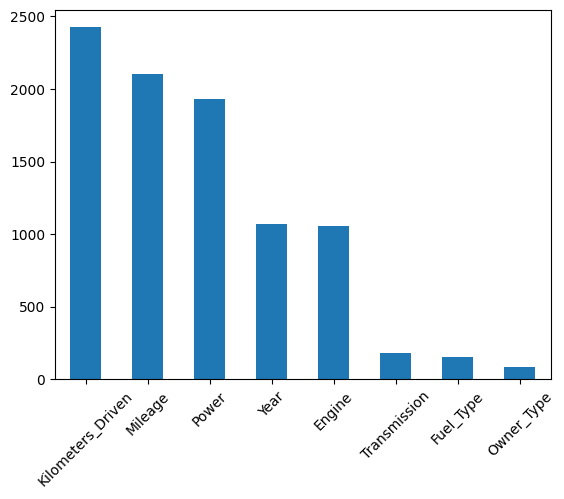

In [ ]:
### feature importance 추출 및 시각화

# 필요한 라이브러리 임폴트
import pandas as pd

# feature importance 추출
importances1 = best_lgbm1.feature_importances_
print(importances1)
print('-'*80)
importances2 = best_lgbm2.feature_importances_
print(importances2)

print('-'*80)

# Series 자료형 생성
s_importances1 = pd.Series(data=importances1, index=X_train1.columns)
print(s_importances1)
print('-'*80)
s_importances2 = pd.Series(data=importances2, index=X_train2.columns)
print(s_importances2)

print('-'*80)

# Series 자료형 --> 내림차순 정렬 + 시각화
s_importances1.sort_values(ascending=False).plot(kind='bar', rot=45)
plt.show()
print('-'*80)
s_importances2.sort_values(ascending=False).plot(kind='bar', rot=45)
plt.show()